In [6]:
import platform
print(platform.architecture())

('64bit', 'WindowsPE')


In [1]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder("Dataset/train", transform=data_transform)
val_data   = datasets.ImageFolder("Dataset/valid", transform=data_transform)
test_data  = datasets.ImageFolder("Dataset/test", transform=data_transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)

In [2]:
train_loader

In [3]:
from collections import Counter
all_counts = {
    "train" : Counter([label for _, label in train_data]),
    "validate" : Counter([label for _, label in val_data]),
    "test" : Counter([label for _, label in test_data])
}

for split, counts in all_counts.items():
    print(f"\n{split.upper()}:")
    for idx, count in counts.items():
        print(f"  {train_data.classes[idx]} : {count} images")


TRAIN:
  bird : 1414 images
  drone : 1248 images

VALIDATE:
  bird : 217 images
  drone : 225 images

TEST:
  bird : 121 images
  drone : 94 images


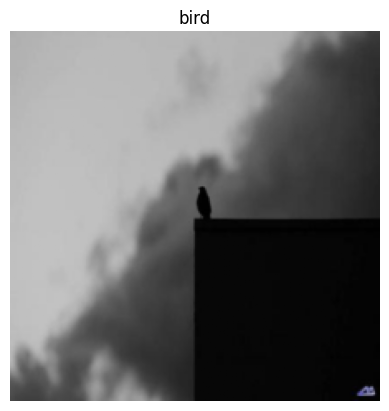

In [4]:
import matplotlib.pyplot as plt
import random

img, label = random.choice(train_data)

plt.imshow(img.permute(1, 2, 0))
plt.title(train_data.classes[label])
plt.axis("off")
plt.show()

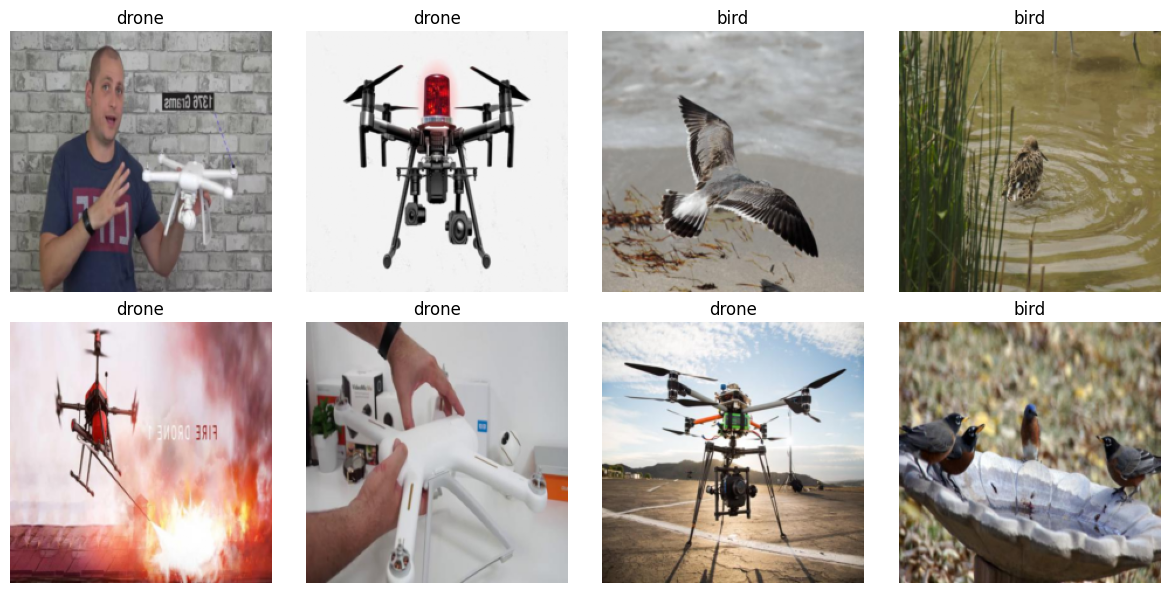

In [5]:
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)

images, labels = next(iter(train_loader))

plt.figure(figsize=(12, 6))

for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title(train_data.classes[labels[i]])
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
img, label = train_data[9]

print(img.shape)
print("Pixel values:\n", img)

torch.Size([3, 224, 224])
Pixel values:
 tensor([[[0.3412, 0.3412, 0.3569,  ..., 0.4431, 0.4588, 0.4706],
         [0.3294, 0.3294, 0.3412,  ..., 0.4667, 0.4824, 0.4980],
         [0.3294, 0.3333, 0.3451,  ..., 0.5020, 0.5176, 0.5294],
         ...,
         [0.4000, 0.4078, 0.3804,  ..., 0.3843, 0.4353, 0.3412],
         [0.3804, 0.4353, 0.4118,  ..., 0.5529, 0.4824, 0.3686],
         [0.3961, 0.4039, 0.3882,  ..., 0.6000, 0.5059, 0.4000]],

        [[0.3725, 0.3686, 0.3804,  ..., 0.4275, 0.4431, 0.4510],
         [0.3608, 0.3569, 0.3647,  ..., 0.4510, 0.4627, 0.4745],
         [0.3569, 0.3608, 0.3686,  ..., 0.4824, 0.4902, 0.5020],
         ...,
         [0.4000, 0.4118, 0.3765,  ..., 0.3490, 0.4000, 0.3059],
         [0.3922, 0.4510, 0.4275,  ..., 0.5176, 0.4471, 0.3333],
         [0.4196, 0.4314, 0.4157,  ..., 0.5608, 0.4667, 0.3608]],

        [[0.2824, 0.2902, 0.3216,  ..., 0.3843, 0.4000, 0.4078],
         [0.2745, 0.2824, 0.3137,  ..., 0.4078, 0.4235, 0.4314],
         [0.2863,

# ROTATION

In [7]:
rotate_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(30),
    transforms.ToTensor()
])

# HORIZONTAL + VERTICAL FLIP

In [8]:
flip_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=1.0),
    transforms.RandomVerticalFlip(p=1.0),
    transforms.ToTensor()
])

# RANDOM ZOOM

In [9]:
zoom_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.RandomCrop((224, 224)),
    transforms.ToTensor()
])

# BRIGHTNESS CHANGE

In [10]:
brightness_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.5),
    transforms.ToTensor()
])

# RANDOM CROP

In [11]:
crop_transform = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.5, 1.0)),
    transforms.ToTensor()
])

# Apply each transform on dataset

In [12]:
train_path = "Dataset/train"

train_rot = datasets.ImageFolder(train_path, transform=rotate_transform)
train_flip = datasets.ImageFolder(train_path, transform=flip_transform)
train_zoom = datasets.ImageFolder(train_path, transform=zoom_transform)
train_bright = datasets.ImageFolder(train_path, transform=brightness_transform)
train_crop = datasets.ImageFolder(train_path, transform=crop_transform)

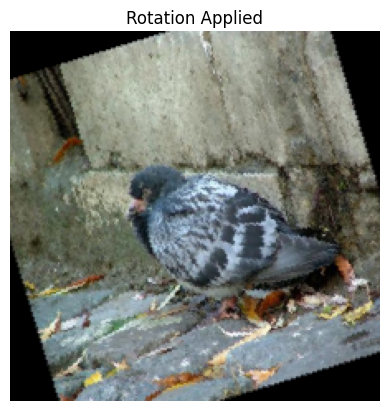

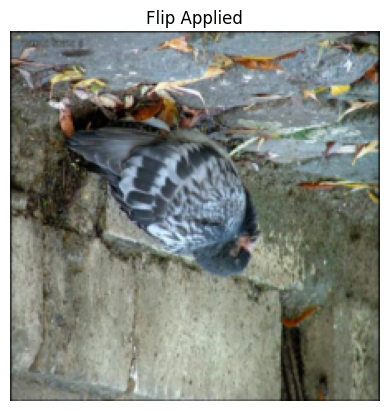

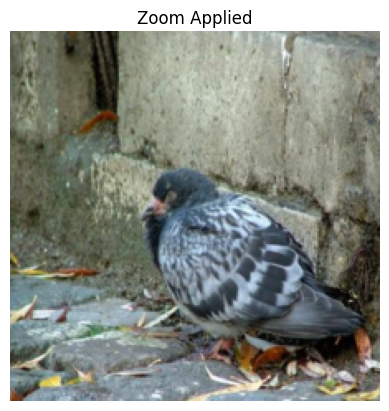

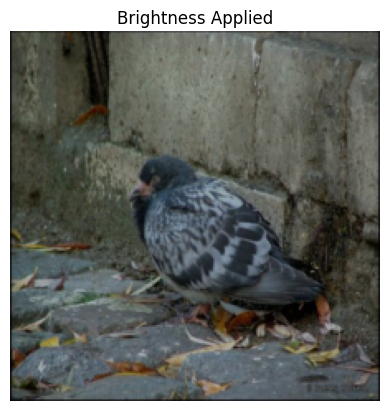

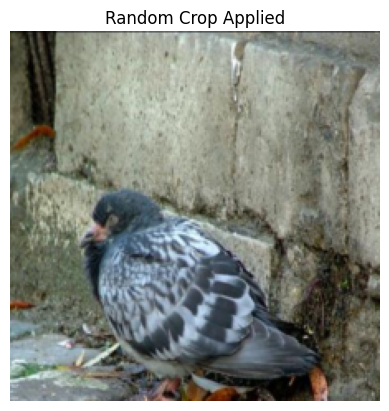

In [13]:
def show_sample(dataset, title):
    img, label = dataset[4]
    plt.imshow(img.permute(1, 2, 0))
    plt.title(title)
    plt.axis("off")
    plt.show()

show_sample(train_rot, "Rotation Applied")
show_sample(train_flip, "Flip Applied")
show_sample(train_zoom, "Zoom Applied")
show_sample(train_bright, "Brightness Applied")
show_sample(train_crop, "Random Crop Applied")

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class CustomCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomCNN, self).__init__()

        # ---- Block 1 ----
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)  # 224 -> 112
        self.drop1 = nn.Dropout(0.25)

        # ---- Block 2 ----
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)  # 112 -> 56
        self.drop2 = nn.Dropout(0.25)

        # ---- Block 3 ----
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2, 2)  # 56 -> 28
        self.drop3 = nn.Dropout(0.25)

        # ---- Fully Connected Layers ----
        self.fc1 = nn.Linear(128 * 28 * 28, 256)
        self.bn_fc = nn.BatchNorm1d(256)
        self.drop_fc = nn.Dropout(0.5)

        self.fc2 = nn.Linear(256, num_classes)  # output layer

    def forward(self, x):
        # Block 1
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.drop1(x)

        # Block 2
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.drop2(x)

        # Block 3
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = self.drop3(x)

        # Flatten
        x = x.view(x.size(0), -1)

        # Fully Connected
        x = F.relu(self.bn_fc(self.fc1(x)))
        x = self.drop_fc(x)

        # Output
        x = self.fc2(x)
        return x

In [16]:
model = CustomCNN(num_classes=2)
print(model)

CustomCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop3): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=100352, out_features=256, bias=True)
  (bn_fc): BatchNorm1d(256, eps=1e-05, mo

# EarlyStopping Class

In [17]:
import numpy as np

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss

        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

        else:
            self.best_loss = val_loss
            self.counter = 0

# ModelCheckpoint

In [18]:
def save_checkpoint(model, path="best_model.pth"):
    torch.save(model.state_dict(), path)
    print("Checkpoint saved:", path)

# Metric Functions

In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    f1 = f1_score(y_true, y_pred, average='binary')
    return precision, recall, f1

In [20]:
from tqdm import tqdm

def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=20, patience=5):

    early_stopping = EarlyStopping(patience=patience)
    best_val_loss = np.inf

    for epoch in range(epochs):
        model.train()
        train_loss = 0
        correct = 0
        total = 0

        # ---------- TRAINING ----------
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            optimizer.zero_grad()

            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total

        # ---------- VALIDATION ----------
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0

        all_preds = []
        all_labels = []

        with torch.no_grad():
            for val_images, val_labels in val_loader:
                outputs = model(val_images)
                loss = criterion(outputs, val_labels)

                val_loss += loss.item()

                _, val_predicted = torch.max(outputs, 1)
                val_correct += (val_predicted == val_labels).sum().item()
                val_total += val_labels.size(0)

                all_preds.extend(val_predicted.tolist())
                all_labels.extend(val_labels.tolist())

        val_acc = val_correct / val_total
        precision, recall, f1 = calculate_metrics(all_labels, all_preds)

        print(f"\nEpoch {epoch+1} Results:")
        print(f"Train Loss: {train_loss/len(train_loader):.4f}  | Train Acc: {train_acc:.4f}")
        print(f"Val Loss:   {val_loss/len(val_loader):.4f}  | Val Acc:   {val_acc:.4f}")
        print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1 Score: {f1:.4f}")

        # ---------- EARLY STOPPING ----------
        early_stopping(val_loss)

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            save_checkpoint(model, "best_model.pth")

        if early_stopping.early_stop:
            print("\nEarly stopping activated!")
            break

    print("\nTraining Finished!")

In [21]:
import torch
model = CustomCNN(num_classes=2)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

train_model(model, train_loader, val_loader, criterion, optimizer, epochs=15, patience=5)

Epoch 1/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:58<00:00,  1.08s/it]



Epoch 1 Results:
Train Loss: 0.5790  | Train Acc: 0.7126
Val Loss:   0.5289  | Val Acc:   0.7760
Precision: 0.8281 | Recall: 0.7067 | F1 Score: 0.7626
Checkpoint saved: best_model.pth


Epoch 2/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:53<00:00,  1.43it/s]



Epoch 2 Results:
Train Loss: 0.4513  | Train Acc: 0.7953
Val Loss:   0.6045  | Val Acc:   0.6878
Precision: 0.9065 | Recall: 0.4311 | F1 Score: 0.5843


Epoch 3/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:51<00:00,  1.44it/s]



Epoch 3 Results:
Train Loss: 0.3922  | Train Acc: 0.8227
Val Loss:   0.5841  | Val Acc:   0.6946
Precision: 0.9500 | Recall: 0.4222 | F1 Score: 0.5846


Epoch 4/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:51<00:00,  1.44it/s]



Epoch 4 Results:
Train Loss: 0.3560  | Train Acc: 0.8479
Val Loss:   0.4864  | Val Acc:   0.8032
Precision: 0.9012 | Recall: 0.6889 | F1 Score: 0.7809
Checkpoint saved: best_model.pth


Epoch 5/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:55<00:00,  1.41it/s]



Epoch 5 Results:
Train Loss: 0.3186  | Train Acc: 0.8633
Val Loss:   0.4858  | Val Acc:   0.8213
Precision: 0.9195 | Recall: 0.7111 | F1 Score: 0.8020
Checkpoint saved: best_model.pth


Epoch 6/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:56<00:00,  1.41it/s]



Epoch 6 Results:
Train Loss: 0.2852  | Train Acc: 0.8798
Val Loss:   0.4646  | Val Acc:   0.8009
Precision: 0.8072 | Recall: 0.8000 | F1 Score: 0.8036
Checkpoint saved: best_model.pth


Epoch 7/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:51<00:00,  1.44it/s]



Epoch 7 Results:
Train Loss: 0.2760  | Train Acc: 0.8892
Val Loss:   0.4378  | Val Acc:   0.8348
Precision: 0.8486 | Recall: 0.8222 | F1 Score: 0.8352
Checkpoint saved: best_model.pth


Epoch 8/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:52<00:00,  1.43it/s]



Epoch 8 Results:
Train Loss: 0.2284  | Train Acc: 0.9095
Val Loss:   0.4525  | Val Acc:   0.8235
Precision: 0.8930 | Recall: 0.7422 | F1 Score: 0.8107


Epoch 9/15: 100%|████████████████████████████████████████████████████████████████████| 333/333 [03:49<00:00,  1.45it/s]



Epoch 9 Results:
Train Loss: 0.2418  | Train Acc: 0.8997
Val Loss:   0.4658  | Val Acc:   0.8235
Precision: 0.8889 | Recall: 0.7467 | F1 Score: 0.8116


Epoch 10/15: 100%|███████████████████████████████████████████████████████████████████| 333/333 [03:54<00:00,  1.42it/s]



Epoch 10 Results:
Train Loss: 0.2222  | Train Acc: 0.9144
Val Loss:   0.4605  | Val Acc:   0.8235
Precision: 0.8731 | Recall: 0.7644 | F1 Score: 0.8152


Epoch 11/15: 100%|███████████████████████████████████████████████████████████████████| 333/333 [04:01<00:00,  1.38it/s]



Epoch 11 Results:
Train Loss: 0.1964  | Train Acc: 0.9279
Val Loss:   0.4749  | Val Acc:   0.8100
Precision: 0.7975 | Recall: 0.8400 | F1 Score: 0.8182


Epoch 12/15: 100%|███████████████████████████████████████████████████████████████████| 333/333 [03:54<00:00,  1.42it/s]



Epoch 12 Results:
Train Loss: 0.1887  | Train Acc: 0.9313
Val Loss:   0.4804  | Val Acc:   0.8167
Precision: 0.8396 | Recall: 0.7911 | F1 Score: 0.8146

Early stopping activated!

Training Finished!


In [53]:
torch.save(model.state_dict(), "best_CNN_model.pth")

# ResNet50 – Transfer Learning

In [22]:
from torchvision import models
def get_resnet50(num_classes=2, fine_tune=False):
    model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

    # Freeze layers
    if not fine_tune:
        for param in model.parameters():
            param.requires_grad = False

    # Replace FC layer
    in_features = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Linear(in_features, 256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256, num_classes)
    )

    return model

# MobileNetV2

In [23]:
def get_mobilenet(num_classes=2, fine_tune=False):
    model = models.mobilenet_v2(weights=models.MobileNet_V2_Weights.IMAGENET1K_V1)

    # Freeze feature extractor
    if not fine_tune:
        for param in model.features.parameters():
            param.requires_grad = False

    # Replace classifier
    model.classifier = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(model.last_channel, num_classes)
    )

    return model

# EfficientNet-B0

In [24]:
def get_efficientnet(num_classes=2, fine_tune=False):
    model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)

    # Freeze base layers
    if not fine_tune:
        for param in model.features.parameters():
            param.requires_grad = False

    # Replace classifier
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

    return model

# Load model

In [25]:
model_resnet50 = get_resnet50(num_classes=2, fine_tune=True)
model_mobilenet = get_mobilenet(num_classes=2, fine_tune=True)
model_efficientnet = get_efficientnet(num_classes=2, fine_tune=True)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


100%|█████████████████████████████████████████████████████████████████████████████| 97.8M/97.8M [00:27<00:00, 3.70MB/s]


Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\mobilenet_v2-b0353104.pth


100%|█████████████████████████████████████████████████████████████████████████████| 13.6M/13.6M [00:02<00:00, 6.26MB/s]


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to C:\Users\HP/.cache\torch\hub\checkpoints\efficientnet_b0_rwightman-7f5810bc.pth


100%|█████████████████████████████████████████████████████████████████████████████| 20.5M/20.5M [00:04<00:00, 4.96MB/s]


# Optimizer & Loss

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.Adam(model_resnet50.parameters(), lr=1e-4)

# Training the resnet50 model

In [27]:
train_model(model_resnet50, train_loader, val_loader, criterion, optimizer_1, epochs=10, patience=5)

Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [10:39<00:00,  1.92s/it]



Epoch 1 Results:
Train Loss: 0.1436  | Train Acc: 0.9489
Val Loss:   0.0518  | Val Acc:   0.9819
Precision: 0.9822 | Recall: 0.9822 | F1 Score: 0.9822
Checkpoint saved: best_model.pth


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [10:03<00:00,  1.81s/it]



Epoch 2 Results:
Train Loss: 0.0460  | Train Acc: 0.9857
Val Loss:   0.4421  | Val Acc:   0.9570
Precision: 0.9682 | Recall: 0.9467 | F1 Score: 0.9573


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [09:57<00:00,  1.80s/it]



Epoch 3 Results:
Train Loss: 0.0282  | Train Acc: 0.9914
Val Loss:   0.3739  | Val Acc:   0.9683
Precision: 0.9414 | Recall: 1.0000 | F1 Score: 0.9698


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [10:31<00:00,  1.90s/it]



Epoch 4 Results:
Train Loss: 0.0096  | Train Acc: 0.9970
Val Loss:   0.0816  | Val Acc:   0.9842
Precision: 0.9781 | Recall: 0.9911 | F1 Score: 0.9845


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [10:18<00:00,  1.86s/it]



Epoch 5 Results:
Train Loss: 0.0376  | Train Acc: 0.9869
Val Loss:   0.9974  | Val Acc:   0.9706
Precision: 0.9775 | Recall: 0.9644 | F1 Score: 0.9709


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [11:53<00:00,  2.14s/it]



Epoch 6 Results:
Train Loss: 0.0042  | Train Acc: 0.9992
Val Loss:   0.7534  | Val Acc:   0.9774
Precision: 0.9909 | Recall: 0.9644 | F1 Score: 0.9775

Early stopping activated!

Training Finished!


In [44]:
torch.save(model_resnet50.state_dict(), "best_resnet50_model.pth")

# Training the mobilenaet model

In [28]:
optimizer_2 = torch.optim.Adam(model_mobilenet.parameters(), lr=1e-4)
train_model(model_mobilenet, train_loader, val_loader, criterion, optimizer_2, epochs=10, patience=5)

Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [04:51<00:00,  1.14it/s]



Epoch 1 Results:
Train Loss: 0.1930  | Train Acc: 0.9222
Val Loss:   0.1069  | Val Acc:   0.9525
Precision: 0.9766 | Recall: 0.9289 | F1 Score: 0.9522
Checkpoint saved: best_model.pth


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [04:38<00:00,  1.20it/s]



Epoch 2 Results:
Train Loss: 0.0789  | Train Acc: 0.9756
Val Loss:   0.0491  | Val Acc:   0.9796
Precision: 0.9737 | Recall: 0.9867 | F1 Score: 0.9801
Checkpoint saved: best_model.pth


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [04:51<00:00,  1.14it/s]



Epoch 3 Results:
Train Loss: 0.0540  | Train Acc: 0.9820
Val Loss:   0.0604  | Val Acc:   0.9774
Precision: 0.9821 | Recall: 0.9733 | F1 Score: 0.9777


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [04:59<00:00,  1.11it/s]



Epoch 4 Results:
Train Loss: 0.0540  | Train Acc: 0.9846
Val Loss:   0.0616  | Val Acc:   0.9842
Precision: 0.9866 | Recall: 0.9822 | F1 Score: 0.9844


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [04:58<00:00,  1.11it/s]



Epoch 5 Results:
Train Loss: 0.0312  | Train Acc: 0.9914
Val Loss:   0.0432  | Val Acc:   0.9887
Precision: 0.9955 | Recall: 0.9822 | F1 Score: 0.9888
Checkpoint saved: best_model.pth


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:17<00:00,  1.05it/s]



Epoch 6 Results:
Train Loss: 0.0204  | Train Acc: 0.9936
Val Loss:   0.0723  | Val Acc:   0.9683
Precision: 0.9907 | Recall: 0.9467 | F1 Score: 0.9682


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:49<00:00,  1.05s/it]



Epoch 7 Results:
Train Loss: 0.0296  | Train Acc: 0.9929
Val Loss:   0.0576  | Val Acc:   0.9774
Precision: 0.9864 | Recall: 0.9689 | F1 Score: 0.9776


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [04:15<00:00,  1.31it/s]



Epoch 8 Results:
Train Loss: 0.0415  | Train Acc: 0.9914
Val Loss:   0.0990  | Val Acc:   0.9570
Precision: 0.9682 | Recall: 0.9467 | F1 Score: 0.9573


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:30<00:00,  1.01it/s]



Epoch 9 Results:
Train Loss: 0.0300  | Train Acc: 0.9914
Val Loss:   0.0692  | Val Acc:   0.9774
Precision: 0.9821 | Recall: 0.9733 | F1 Score: 0.9777


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████| 333/333 [05:56<00:00,  1.07s/it]



Epoch 10 Results:
Train Loss: 0.0399  | Train Acc: 0.9891
Val Loss:   0.0622  | Val Acc:   0.9751
Precision: 0.9864 | Recall: 0.9644 | F1 Score: 0.9753

Early stopping activated!

Training Finished!


In [45]:
torch.save(model_mobilenet.state_dict(), "best_mobilenet_model.pth")

# Training the efficientnet model

In [29]:
optimizer_3 = torch.optim.Adam(model_efficientnet.parameters(), lr=1e-4)
train_model(model_efficientnet, train_loader, val_loader, criterion, optimizer_3, epochs=10, patience=5)

Epoch 1/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [06:56<00:00,  1.25s/it]



Epoch 1 Results:
Train Loss: 0.2250  | Train Acc: 0.9095
Val Loss:   0.0879  | Val Acc:   0.9751
Precision: 0.9573 | Recall: 0.9956 | F1 Score: 0.9760
Checkpoint saved: best_model.pth


Epoch 2/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:35<00:00,  1.01s/it]



Epoch 2 Results:
Train Loss: 0.0907  | Train Acc: 0.9722
Val Loss:   0.0889  | Val Acc:   0.9706
Precision: 0.9690 | Recall: 0.9733 | F1 Score: 0.9712


Epoch 3/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:46<00:00,  1.04s/it]



Epoch 3 Results:
Train Loss: 0.0467  | Train Acc: 0.9865
Val Loss:   0.0893  | Val Acc:   0.9706
Precision: 0.9609 | Recall: 0.9822 | F1 Score: 0.9714


Epoch 4/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [06:34<00:00,  1.18s/it]



Epoch 4 Results:
Train Loss: 0.0504  | Train Acc: 0.9872
Val Loss:   0.0880  | Val Acc:   0.9751
Precision: 0.9652 | Recall: 0.9867 | F1 Score: 0.9758


Epoch 5/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:21<00:00,  1.04it/s]



Epoch 5 Results:
Train Loss: 0.0339  | Train Acc: 0.9891
Val Loss:   0.0856  | Val Acc:   0.9751
Precision: 0.9864 | Recall: 0.9644 | F1 Score: 0.9753
Checkpoint saved: best_model.pth


Epoch 6/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:18<00:00,  1.05it/s]



Epoch 6 Results:
Train Loss: 0.0276  | Train Acc: 0.9910
Val Loss:   0.0670  | Val Acc:   0.9683
Precision: 0.9648 | Recall: 0.9733 | F1 Score: 0.9690
Checkpoint saved: best_model.pth


Epoch 7/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:27<00:00,  1.02it/s]



Epoch 7 Results:
Train Loss: 0.0186  | Train Acc: 0.9929
Val Loss:   0.0703  | Val Acc:   0.9819
Precision: 0.9780 | Recall: 0.9867 | F1 Score: 0.9823


Epoch 8/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:18<00:00,  1.05it/s]



Epoch 8 Results:
Train Loss: 0.0085  | Train Acc: 0.9981
Val Loss:   0.0495  | Val Acc:   0.9842
Precision: 0.9955 | Recall: 0.9733 | F1 Score: 0.9843
Checkpoint saved: best_model.pth


Epoch 9/10: 100%|████████████████████████████████████████████████████████████████████| 333/333 [05:00<00:00,  1.11it/s]



Epoch 9 Results:
Train Loss: 0.0142  | Train Acc: 0.9970
Val Loss:   0.0542  | Val Acc:   0.9842
Precision: 0.9866 | Recall: 0.9822 | F1 Score: 0.9844


Epoch 10/10: 100%|███████████████████████████████████████████████████████████████████| 333/333 [05:19<00:00,  1.04it/s]



Epoch 10 Results:
Train Loss: 0.0106  | Train Acc: 0.9981
Val Loss:   0.0803  | Val Acc:   0.9774
Precision: 0.9736 | Recall: 0.9822 | F1 Score: 0.9779

Training Finished!


In [46]:
torch.save(model_efficientnet.state_dict(), "best_efficientnet_model.pth")

# Evaluate Model on Test set

In [47]:
import torch
import numpy as np

model.eval()
y_pred = []
y_true = []
device = 'cpu'
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
print(cm)

              precision    recall  f1-score   support

        bird       0.86      0.91      0.88       121
       drone       0.87      0.81      0.84        94

    accuracy                           0.87       215
   macro avg       0.87      0.86      0.86       215
weighted avg       0.87      0.87      0.86       215

[[110  11]
 [ 18  76]]


In [58]:
model_efficientnet.eval()
y_pred = []
y_true = []
device = 'cpu'
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model_efficientnet(images)
        _, predicted = torch.max(outputs, 1)

        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
print(cm)

              precision    recall  f1-score   support

        bird       0.98      0.98      0.98       121
       drone       0.98      0.98      0.98        94

    accuracy                           0.98       215
   macro avg       0.98      0.98      0.98       215
weighted avg       0.98      0.98      0.98       215

[[119   2]
 [  2  92]]


### Confusion Matrix

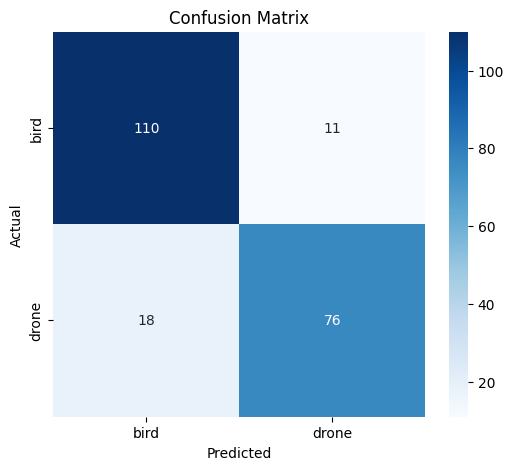

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot Accuracy & Loss Curves

In [86]:
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(Train Acc)
plt.plot(Val Acc)
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3461503117.py, line 5)

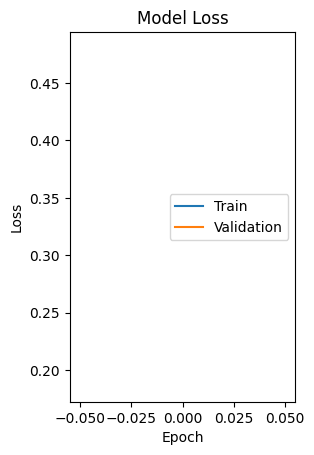

In [51]:
# Loss
plt.subplot(1,2,2)
plt.plot(train_loss_history)
plt.plot(val_loss_history)
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])

plt.show()

# Create a Model Comparison Table

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import numpy as np

def evaluate_model(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            preds = torch.argmax(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='macro')
    recall = recall_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    return acc, precision, recall, f1

In [60]:
results = {}

results["CNN"] = evaluate_model(model, test_loader)
results["ResNet50"] = evaluate_model(model_resnet50, test_loader)
results["MobileNetV2"] = evaluate_model(model_mobilenet, test_loader)
results["EfficientNetB0"] = evaluate_model(model_efficientnet, test_loader)

In [62]:
training_times = {
    "CNN": 1.51,
    "ResNet50": 1.90,
    "MobileNetV2": 1.11,
    "EfficientNetB0": 1.07
}

# Convert Dictionary into Pandas Dataframe

In [63]:
import pandas as pd

df = pd.DataFrame([
    {
        "Model": "CNN",
        "Accuracy": results["CNN"][0],
        "Precision": results["CNN"][1],
        "Recall": results["CNN"][2],
        "F1 Score": results["CNN"][3],
        "Train Time (it/s)": training_times["CNN"]
    },
    {
        "Model": "ResNet50",
        "Accuracy": results["ResNet50"][0],
        "Precision": results["ResNet50"][1],
        "Recall": results["ResNet50"][2],
        "F1 Score": results["ResNet50"][3],
        "Train Time (it/s)": training_times["ResNet50"]
    },
    {
        "Model": "MobileNetV2",
        "Accuracy": results["MobileNetV2"][0],
        "Precision": results["MobileNetV2"][1],
        "Recall": results["MobileNetV2"][2],
        "F1 Score": results["MobileNetV2"][3],
        "Train Time (it/s)": training_times["MobileNetV2"]
    },
    {
        "Model": "EfficientNetB0",
        "Accuracy": results["EfficientNetB0"][0],
        "Precision": results["EfficientNetB0"][1],
        "Recall": results["EfficientNetB0"][2],
        "F1 Score": results["EfficientNetB0"][3],
        "Train Time (it/s)": training_times["EfficientNetB0"]
    }
])

print(df)

            Model  Accuracy  Precision    Recall  F1 Score  Train Time (it/s)
0             CNN  0.776744   0.796726  0.756550  0.761111               1.51
1        ResNet50  0.976744   0.980159  0.973404  0.976217               1.90
2     MobileNetV2  0.986047   0.985307  0.986416  0.985839               1.11
3  EfficientNetB0  0.981395   0.981097  0.981097  0.981097               1.07


In [67]:
results

{'CNN': (0.7767441860465116,
  0.7967256457189343,
  0.7565500263759452,
  0.7611111111111111),
 'ResNet50': (0.9767441860465116,
  0.9801587301587302,
  0.9734042553191489,
  0.976217340324329),
 'MobileNetV2': (0.986046511627907,
  0.9853070175438596,
  0.9864163882539125,
  0.9858394256734506),
 'EfficientNetB0': (0.9813953488372092,
  0.9810972393177422,
  0.9810972393177422,
  0.9810972393177422)}

# Select Best Model

In [82]:
from PIL import Image
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def predict_image(image_path, model, class_names):
    img = Image.open(image_path).convert("RGB")
    img = transform(img).unsqueeze(0).to(device)

    model.eval()
    with torch.no_grad():
        outputs = model(img)
        _, pred = torch.max(outputs, 1)

    return class_names[pred.item()]

In [85]:
class_names = ["bird", "drone"] 

img_path = "D:/Aerial Object Classification & Detection/Dataset/test/bird/0a7e246b483ed57b_jpg.rf.446903614d856f120545c0fc350c2209.jpg"
prediction = predict_image(img_path, model, class_names)

print("Prediction:", prediction)

Prediction: bird
